In [1]:
import random_walker as rw
import utils
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from networkx.drawing.nx_agraph import graphviz_layout

/home/k1801311/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
/home/k1801311/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:676: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cb.iterable(node_size):  # many node sizes


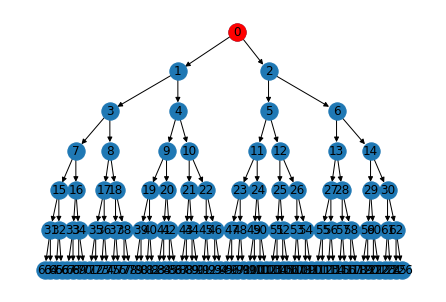

In [2]:
#Create a regular tree with set offspring factor and height above the root, with edges directed away from root.
offspring_factor=2
height=6
H=nx.generators.classic.balanced_tree(offspring_factor,height)
root=utils.list_degree_nodes(H,offspring_factor,1)[0]
H,_=utils.directify(H,root)
pos=graphviz_layout(H,prog='dot')
nx.draw(H,pos)
nx.draw_networkx_labels(H,pos)
nx.draw_networkx_nodes(H,pos,nodelist=[root],node_color='r',labels=True)
plt.show()

In [3]:
#In case we want to look at metrics other than Hamming
def metric(*args):
    return rw.hamming_dist(*args)

/home/k1801311/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:585: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  and cb.iterable(edge_color) \
/home/k1801311/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:595: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  for c in edge_color]):


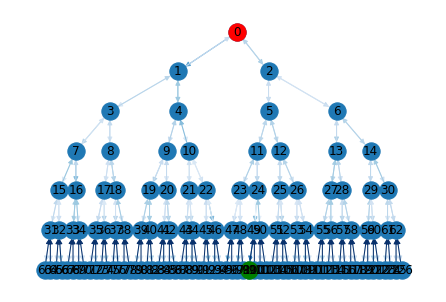

In [4]:
#Create patternWalker based on the above tree.
pattern_len=15 #String/pattern length
flip_rate=5/pattern_len #Bit flipping rate for propagating patterns
G=rw.patternWalker(H,root,pattern_len,flip_rate,metric=metric)
G.set_weights()
#pos=graphviz_layout(G,prog='dot') #Positions can be taken from H
(edges,weights) = zip(*nx.get_edge_attributes(G,'weight').items())
nx.draw(G, pos, edgelist=edges, edge_color=weights, width=1.0, edge_cmap=plt.cm.Blues)
nx.draw_networkx_labels(H,pos)
nx.draw_networkx_nodes(G,pos,nodelist=[root],node_color='r')
#Mark target node in green.
nx.draw_networkx_nodes(G,pos,nodelist=[G.target_node],node_color='g')
plt.show()

In [5]:
print('Number of duplicate strings/Number of strings:', G.num_pattern_duplicates(),'/',len(G))
mfpts_root_leaves=utils.mfpt(G,[(root,b) for b in utils.leaves(G.hierarchy_backup)])
print('target node:', G.target_node)
mfpts_root_leaves

Number of duplicate strings/Number of strings: 0 / 127
target node: 99


{(0, 63): (194.58748064223377+0j),
 (0, 64): (194.58748064223374+0j),
 (0, 65): (196.34144889620222+0j),
 (0, 66): (196.341448896202+0j),
 (0, 67): (193.8334402381933+0j),
 (0, 68): (193.83344023819308+0j),
 (0, 69): (193.69455134930467+0j),
 (0, 70): (193.6945513493042+0j),
 (0, 71): (210.6199709129035+0j),
 (0, 72): (210.61997091290354+0j),
 (0, 73): (212.9850502779826+0j),
 (0, 74): (212.9850502779825+0j),
 (0, 75): (203.5613850543169+0j),
 (0, 76): (203.56138505431673+0j),
 (0, 77): (201.0159305088626+0j),
 (0, 78): (201.0159305088627+0j),
 (0, 79): (169.42791859653707+0j),
 (0, 80): (169.4279185965371+0j),
 (0, 81): (169.33700950562843+0j),
 (0, 82): (169.33700950562817+0j),
 (0, 83): (173.13059158492493+0j),
 (0, 84): (173.13059158492513+0j),
 (0, 85): (171.91847037280414+0j),
 (0, 86): (171.91847037280408+0j),
 (0, 87): (182.83350692355356+0j),
 (0, 88): (182.8335069235536+0j),
 (0, 89): (183.94461803466487+0j),
 (0, 90): (183.94461803466487+0j),
 (0, 91): (189.4186948220744+0j)

In [6]:
#Now, get MFPT for all pairs (root, node)
mfpts_root_all={}
for branch in G.hierarchy_backup.successors(G.root):
    mfpts_root_all[branch]=utils.mfpt(G,[(root,b) for b in nx.descendants(G.hierarchy_backup,branch)])

/home/k1801311/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:844: ComplexWarning: Casting complex values to real discards the imaginary part
  indices = f_indices.astype(np.intp)
/home/k1801311/anaconda3/lib/python3.7/site-packages/matplotlib/transforms.py:796: ComplexWarning: Casting complex values to real discards the imaginary part
  points = np.array(args, dtype=float).reshape(2, 2)
/home/k1801311/anaconda3/lib/python3.7/site-packages/matplotlib/transforms.py:1959: ComplexWarning: Casting complex values to real discards the imaginary part
  x, y = float(x), float(y)


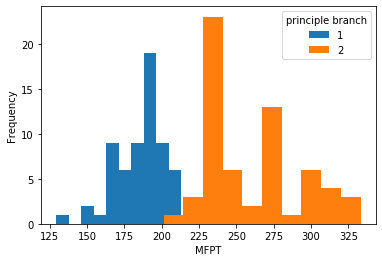

In [7]:
for branch in G.hierarchy_backup.successors(G.root):
    _=plt.hist(mfpts_root_all[branch].values(),label=str(branch))
plt.legend(loc='best', title='principle branch')
plt.xlabel('MFPT')
plt.ylabel('Frequency')
plt.show()

In [8]:
#We can also sample over a number realisations of patterns
mfpts_root_leaves_sampling=[]
down_c=[] #downward "current"
up_c=[] #upward "current"
for _ in range(200):
    G.reset_patterns()
    G.set_weights()
    t_temp=utils.mfpt(G,[(root,b) for b in utils.leaves(G.hierarchy_backup)])
    d_temp=utils.downward_current(G.hierarchy_backup,nx.to_dict_of_dicts(G),nodelist=G.nodes())
    u_temp=utils.upward_current(G.hierarchy_backup,nx.to_dict_of_dicts(G),nodelist=G.nodes())
    for x in t_temp.values():
        mfpts_root_leaves_sampling.append(x)
    for x in d_temp:
        down_c.append(x)
    for x in u_temp:
        up_c.append(x)
down_c=np.array(down_c)
up_c=np.array(up_c)

/home/k1801311/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:897: ComplexWarning: Casting complex values to real discards the imaginary part
  db = np.array(np.diff(bin_edges), float)


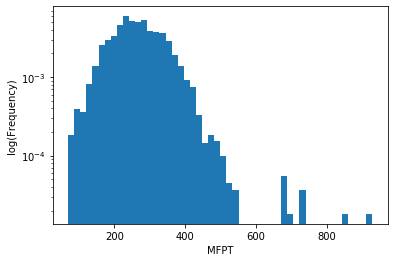

In [9]:
_=plt.hist(mfpts_root_leaves_sampling,bins=50,density=True)
plt.yscale('log')
#plt.xscale('log')
plt.xlabel('MFPT')
plt.ylabel('log(Frequency)')
plt.show()

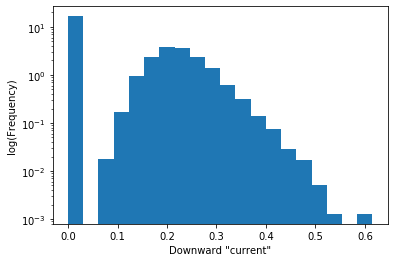

In [10]:
_=plt.hist(down_c,bins=20,density=True)
plt.xlabel('Downward "current"')
plt.ylabel('log(Frequency)')
plt.yscale('log')
#plt.xscale('log')
plt.show()

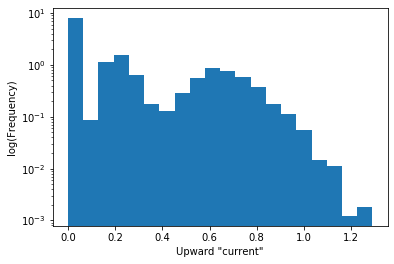

In [11]:
_=plt.hist(up_c,bins=20,density=True)
plt.xlabel('Upward "current"')
plt.ylabel('log(Frequency)')
plt.yscale('log')
#plt.xscale('log')
plt.show()

In [12]:
root_block=[0]
first_block=[1]+[x for x in nx.descendants(G.hierarchy_backup,1)]
second_block=[2]+[x for x in nx.descendants(G.hierarchy_backup,2)]
blocking=np.array(root_block+first_block+second_block)

M=utils.normalised_laplacian(G)[blocking]
M=M[:,blocking]

In [13]:
#Needed to see if a certain formula for the MP inverse of the normalised graph Laplacian holds true.

A=M[root_block,root_block]
B=np.squeeze(np.array(M[root_block,len(root_block):]))
C=np.squeeze(np.array(M[len(root_block):,root_block]))
D1=M[len(root_block):len(root_block+first_block),len(root_block):len(root_block+first_block)]
D2=M[len(root_block+first_block):,len(root_block+first_block):]

D=np.zeros((len(D1)+len(D2),len(D1)+len(D2)))
D[:len(D1),:len(D1)]=D1
D[len(D1):,len(D1):]=D2

a=np.linalg.pinv(A)
F=D-np.matmul(C,B)
f=np.linalg.pinv(F)

m=np.zeros(M.shape)
m[0,0]=1+np.matmul(np.matmul(B,f), C)
m[0,1:]=-np.matmul(B,f)
m[1:,0]=-np.matmul(f,C)
m[1:,1:]=f
print(m)
print(np.linalg.norm(m-np.linalg.pinv(M)))

[[ 1.50050674  0.54606099  0.11962051 ...  0.03699059  0.04798843
   0.03621921]
 [ 0.54606099  1.8287122   1.12444632 ... -0.68674615 -0.81574435
  -0.63294928]
 [ 0.11962051  1.12444632  2.87066199 ... -0.95761485 -1.13749295
  -0.88259924]
 ...
 [ 0.03699059 -0.68674615 -0.95761485 ...  4.97501621  3.21599685
   2.4899417 ]
 [ 0.04798843 -0.81574435 -1.13749295 ...  3.21599685  6.34580684
   4.13946776]
 [ 0.03621921 -0.63294928 -0.88259924 ...  2.4899417   4.13946776
   4.20534996]]
15.387777095444958


/home/k1801311/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: ComplexWarning: Casting complex values to real discards the imaginary part
  # Remove the CWD from sys.path while we load stuff.
/home/k1801311/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: ComplexWarning: Casting complex values to real discards the imaginary part
  # This is added back by InteractiveShellApp.init_path()
/home/k1801311/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: ComplexWarning: Casting complex values to real discards the imaginary part
/home/k1801311/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: ComplexWarning: Casting complex values to real discards the imaginary part
/home/k1801311/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: ComplexWarning: Casting complex values to real discards the imaginary part
/home/k1801311/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: ComplexWarning: Casting complex values 

In [14]:
M

matrix([[ 1.        +0.j, -0.45022517+0.j,  0.        +0.j, ...,
          0.        +0.j,  0.        +0.j,  0.        +0.j],
        [-0.45022517+0.j,  1.        +0.j, -0.33101213+0.j, ...,
          0.        +0.j,  0.        +0.j,  0.        +0.j],
        [ 0.        +0.j, -0.33101213+0.j,  1.        +0.j, ...,
          0.        +0.j,  0.        +0.j,  0.        +0.j],
        ...,
        [ 0.        +0.j,  0.        +0.j,  0.        +0.j, ...,
          1.        +0.j,  0.        +0.j,  0.        +0.j],
        [ 0.        +0.j,  0.        +0.j,  0.        +0.j, ...,
          0.        +0.j,  1.        +0.j,  0.        +0.j],
        [ 0.        +0.j,  0.        +0.j,  0.        +0.j, ...,
          0.        +0.j,  0.        +0.j,  1.        +0.j]])